<a href="https://colab.research.google.com/github/devinaalifia0-alt/UTS-PENGOLAHAN-CITRA-DIGITAL/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

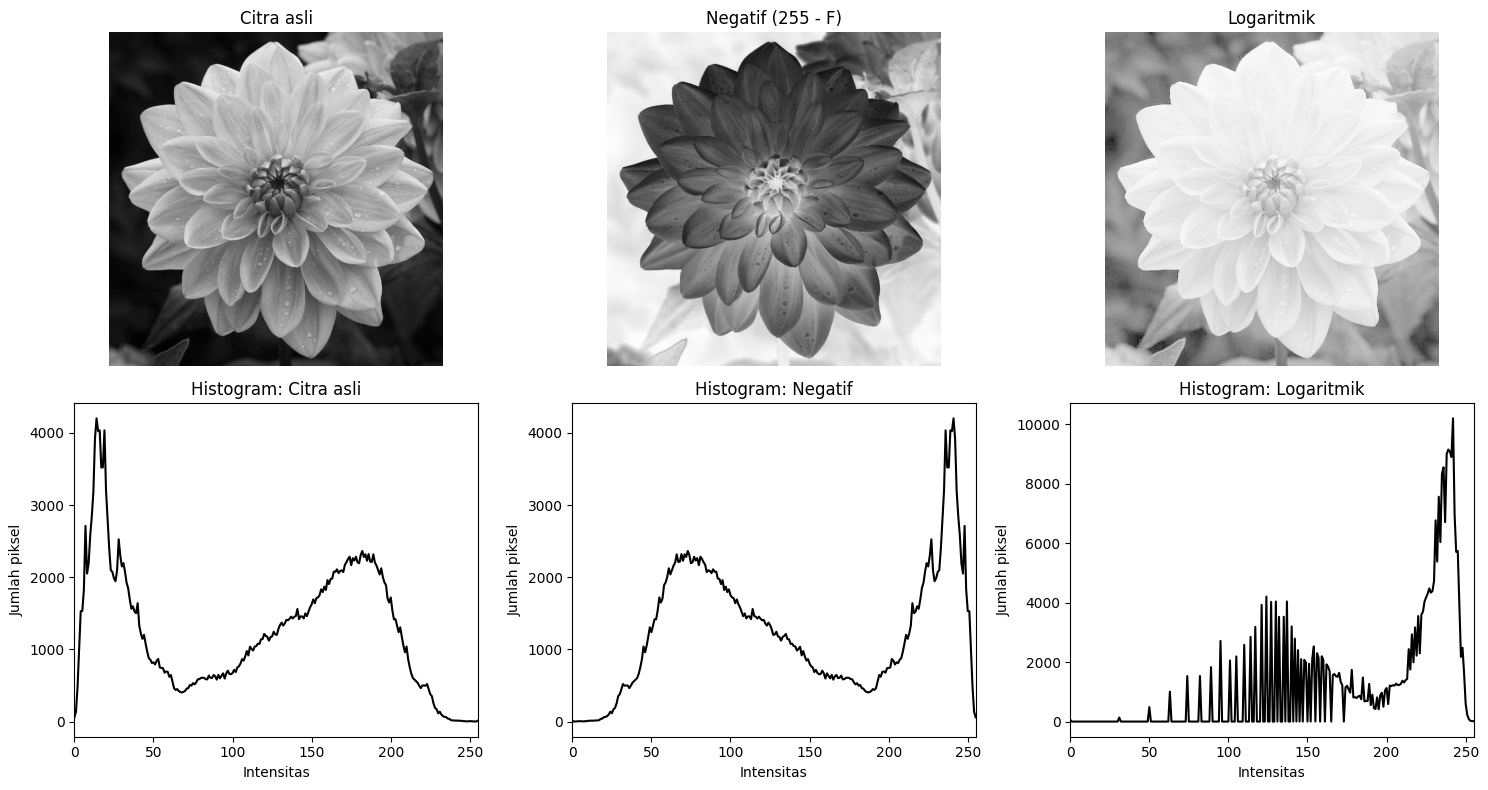

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ========== CONFIG ==========
input_path = "bunga-dahlia.jpg"   # ganti dengan path citra Anda
cmap = 'gray'
# ============================

# Baca citra sebagai grayscale
F = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
if F is None:
    raise FileNotFoundError(f"File tidak ditemukan: {input_path}")

# Pastikan array tipe uint8
F = F.astype(np.uint8)

# 1) Negatif: G = 255 - F
neg = 255 - F

# 2) Logaritmik: G = c * log(1 + F), dengan c = 255 / log(1 + max(F))
F_max = float(F.max())
if F_max <= 0:
    # Jika citra semua nol, hasil log akan nol juga
    log_img = np.zeros_like(F, dtype=np.uint8)
else:
    c = 255.0 / np.log(1.0 + F_max)
    log_float = c * np.log1p(F.astype(np.float32))   # log1p untuk stabilitas
    # Normalisasi dan konversi ke uint8 (clipping untuk keamanan)
    log_img = np.clip(log_float, 0, 255).astype(np.uint8)

# Fungsi untuk membuat histogram (0-255)
def hist_img(img):
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0,256])
    return hist

hist_F = hist_img(F)
hist_neg = hist_img(neg)
hist_log = hist_img(log_img)

# Tampilkan: baris 1 = citra asli, negatif, log; baris 2 = histogram masing-masing
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

# Gambar citra
axes[0].imshow(F, cmap=cmap, vmin=0, vmax=255)
axes[0].set_title("Citra asli")
axes[0].axis('off')

axes[1].imshow(neg, cmap=cmap, vmin=0, vmax=255)
axes[1].set_title("Negatif (255 - F)")
axes[1].axis('off')

axes[2].imshow(log_img, cmap=cmap, vmin=0, vmax=255)
axes[2].set_title("Logaritmik")
axes[2].axis('off')

# Histogram citra
axes[3].plot(hist_F, color='black')
axes[3].set_title("Histogram: Citra asli")
axes[3].set_xlim([0,255])
axes[3].set_xlabel("Intensitas")
axes[3].set_ylabel("Jumlah piksel")

axes[4].plot(hist_neg, color='black')
axes[4].set_title("Histogram: Negatif")
axes[4].set_xlim([0,255])
axes[4].set_xlabel("Intensitas")
axes[4].set_ylabel("Jumlah piksel")

axes[5].plot(hist_log, color='black')
axes[5].set_title("Histogram: Logaritmik")
axes[5].set_xlim([0,255])
axes[5].set_xlabel("Intensitas")
axes[5].set_ylabel("Jumlah piksel")

plt.tight_layout()
plt.show()

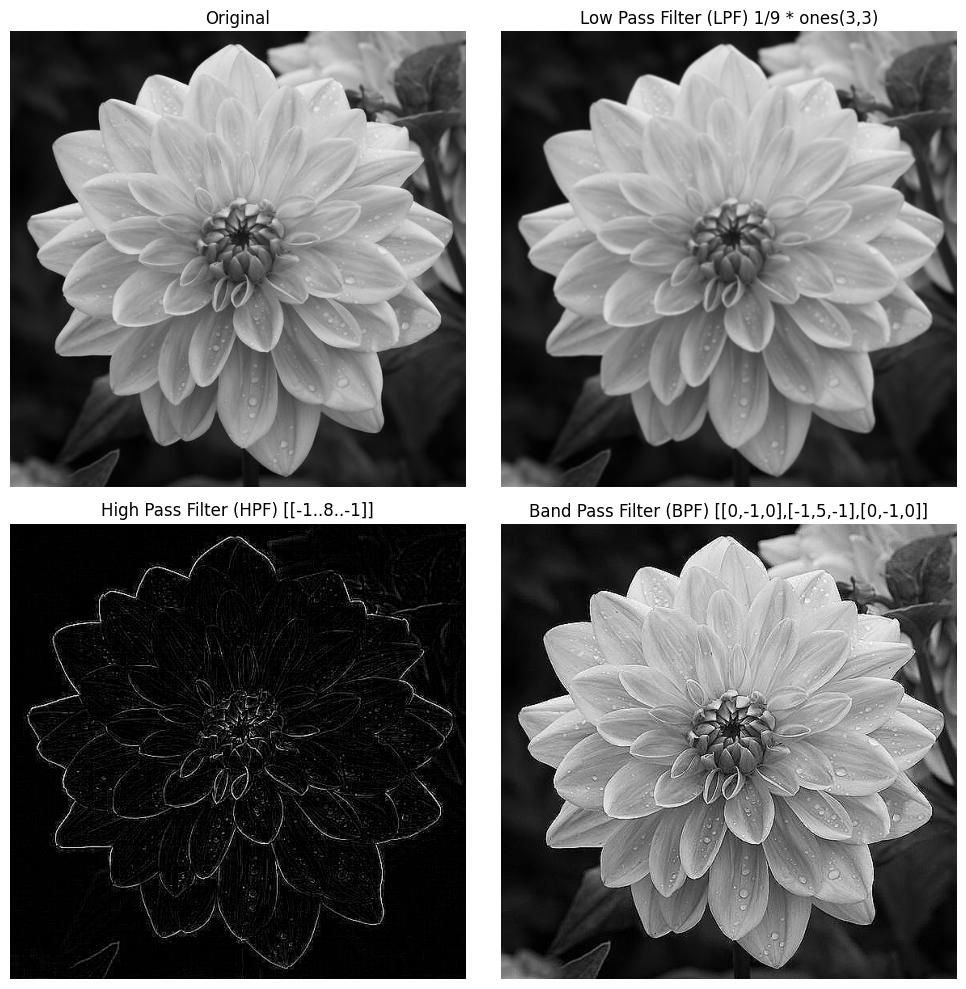

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ========== KONFIG ==========
input_path = "bunga-dahlia.jpg"   # ganti dengan path citra grayscale Anda
cmap = 'gray'
# ===========================

# Baca citra sebagai grayscale
img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"File tidak ditemukan: {input_path}")

# Definisi kernel sesuai soal
k_lpf = (1.0/9.0) * np.array([[1,1,1],
                              [1,1,1],
                              [1,1,1]], dtype=np.float32)

k_hpf = np.array([[-1,-1,-1],
                  [-1, 8,-1],
                  [-1,-1,-1]], dtype=np.float32)

k_bpf = np.array([[ 0,-1, 0],
                  [-1, 5,-1],
                  [ 0,-1, 0]], dtype=np.float32)

# Terapkan filter (menggunakan border reflect untuk mengurangi artefak tepi)
lpf = cv2.filter2D(img, ddepth=-1, kernel=k_lpf, borderType=cv2.BORDER_REFLECT)
hpf = cv2.filter2D(img, ddepth=-1, kernel=k_hpf, borderType=cv2.BORDER_REFLECT)
bpf = cv2.filter2D(img, ddepth=-1, kernel=k_bpf, borderType=cv2.BORDER_REFLECT)

# Jika hasil HPF/BPF menghasilkan nilai di luar 0-255 (tipe uint8),
# clip dan konversi untuk tampilan
def to_uint8(x):
    x = np.clip(x, 0, 255)
    return x.astype(np.uint8)

lpf = to_uint8(lpf)
hpf = to_uint8(hpf)
bpf = to_uint8(bpf)

# Tampilkan original dan hasil filter dalam satu figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

axes[0].imshow(img, cmap=cmap, vmin=0, vmax=255)
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(lpf, cmap=cmap, vmin=0, vmax=255)
axes[1].set_title("Low Pass Filter (LPF) 1/9 * ones(3,3)")
axes[1].axis('off')

axes[2].imshow(hpf, cmap=cmap, vmin=0, vmax=255)
axes[2].set_title("High Pass Filter (HPF) [[-1..8..-1]]")
axes[2].axis('off')

axes[3].imshow(bpf, cmap=cmap, vmin=0, vmax=255)
axes[3].set_title("Band Pass Filter (BPF) [[0,-1,0],[-1,5,-1],[0,-1,0]]")
axes[3].axis('off')

plt.tight_layout()
plt.show()